# Final Project - Programming For Data Science - 21KHDL1

## VNU HCM - University of Science
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Tran Nguyen Huan  | 21127050 |
| Nguyen Phat Dat   | 21127240 |

# Table of Contents

## Overview
---

<h3>
    <b>
    US Accidents (2016 - 2023)
    </b>
</h3>
    <img style="padding:10px" src="https://hire.refactored.ai/upload-nct/portfolio_images/253/1626148168_GqMh6a2U.png" width="800"/>
</center>
This is a countrywide car accident dataset that were collected using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks.

The data covers _49 states of the USA_ from _February 2016 to March 2023_. 

Note that the original dataset contains approximately __7.7 million records__ which is too large for our purpose (mostly data analysis). Therefore, we will just use a sampled version of this dataset which contains only __500.000 accident records__.

Visit [here](https://smoosavi.org/datasets/us_accidents) for more information about the dataset.

This Dataset can be accessed [here](https://doi.org/10.34740/KAGGLE/DS/199387): Sobhan Moosavi. (2023). <i>US Accidents (2016 - 2023)</i> Kaggle. Or [here](https://drive.google.com/file/d/1U3u8QYzLjnEaSurtZfSAS_oh9AT2Mn8X) for the sampled data.
<center>


__Goal:__ The primary goal of the project is to analyze and generate insights on the traffic accidents that took place in USA from Feb. 2016 to Mar. 2023.

## Usage Policy and Legal Disclaimer
---
This dataset is being distributed solely for research purposes under the Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0). By downloading the dataset, we agree to use it only for non-commercial, research, or academic applications.

## Code Environment
---

In [65]:
import sys
sys.executable

'd:\\Downloads\\anaconda\\python.exe'

## Import necessary libraries
---

In [66]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

## Dataset Import
---

In the first place we are going to import the dataset using Pandas module.

In [67]:
df = pd.read_csv("Data/US_Accidents_March23_sampled_500k.csv")

Let's take a quick look at our data by examining the number of rows, columns.  

In [68]:
# print out the shape to know number of rows and columns
print("Shape:", df.shape)

Shape: (500000, 46)


There are __500.000__ records of accidents in our data with each has __46__ features about that accident.

The number of features here are a little too large, which might result in truncating when the data is being displayed. Therefore, we will set a larger the number of max columns in case this is not handled automatically.

In [69]:
# Set the Pandas display options to show all columns
pd.set_option('display.max_columns', 50)

Then, print out some samples to get a quick insight from our data.

In [70]:
# examine 4 random samples from the data
df.sample(4)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
222570,A-7413850,Source1,2,2019-09-10 14:06:00,2019-09-10 15:19:16,37.952547,-121.275063,37.952547,-121.275063,0.000,At S Wilson Way - Accident.,Ort J Lofthus Fwy E,Stockton,San Joaquin,CA,95205,US,US/Pacific,KSCK,2019-09-10 13:55:00,80.0,80.0,34.0,29.85,10.0,WSW,9.0,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
287971,A-4019418,Source1,4,2022-09-29 13:51:00,2022-09-29 16:45:00,38.721955,-104.730077,38.768714,-104.778768,4.162,Between CO 16 and Exit 135: South Academy Boul...,I-25 N,Fountain,El Paso,CO,80817,US,US/Mountain,KFCS,2022-09-29 13:56:00,81.0,81.0,16.0,24.32,10.0,ENE,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
453312,A-2935098,Source2,2,2018-03-09 19:51:44,2018-03-09 20:51:31,34.998356,-82.748680,NaN,NaN,0.000,Accident on SC-11 Cherokee Foothills Scenic Hw...,Cherokee Foothills Scenic Hwy,Pickens,Pickens,SC,29671-9597,US,US/Eastern,KLQK,2018-03-09 19:55:00,52.0,NaN,37.0,29.99,10.0,SW,8.1,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
330021,A-5872429,Source1,2,2021-06-28 17:38:18,2021-06-28 18:10:35,35.829305,-78.627948,35.821575,-78.612711,1.007,Slow traffic on US-1 N - I-440 E from Six Fork...,I-440 E,Raleigh,Wake,NC,27609,US,US/Eastern,KRDU,2021-06-28 17:51:00,86.0,86.0,61.0,29.78,10.0,SSE,6.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


## Features explanation
There are __46__ features in our dataset, include:
1. `ID`: A unique identifier of the accident record.
2. `Source`: Source of raw accident data (it were collected from two different sources).
3. `Severity`: The severity of the accident by a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
4. `Start_Time`: Start time of the accident in local time zone.
5. `End_Time`: Refers to when the impact of accident on traffic flow was dismissed.
6. `Start_Lat`: Latitude in GPS coordinate of the start point.
7. `Start_Lng`: Longitude in GPS coordinate of the start point.
8. `End_Lat`: same as above but for the end point.
9. `End_Lng`: same as above but for the end point.
10. `Distance(mi)`: The length of the road extent affected by the accident (in _miles_).
11. `Description`: Shows a human provided description of the accident.
12. `Street`: Shows the street name in address field.
13. `City`: City name.
14. `County`: Country name.
15. `State`: State name.
16. `Zipcode`: Zipcode.
17. `Country`: Country in address field (this field is different from above field).
18. `Timezone`: Shows timezone based on the location of the accident (eastern, central, etc.).
19. `Airport_Code`: Denotes an airport-based weather station which is the closest one to location of the accident.
20. `Weather_Timestamp`: Time-stamp of weather observation record.
21. `Temperature(F)`: Temperature (in Fahrenheit).
22. `Wind_Chill(F)`: Wind chill (in Fahrenheit).
23. `Humidity(%)`: Humidity (in percentage).
24. `Pressure(in)`: Air pressure (in inches).
25. `Visibility(mi)`: Visibility (in miles).
26. `Wind_Direction`: Wind direction.
27. `Wind_Speed(mph)`: Wind speed (in miles per hour).
28. `Precipitation(in)`: Precipitation amount in inches.
29. `Weather_Condition`: Weather condition (rain, snow, thunderstorm, fog, etc.)
30. `Amenity`: Amenity in a nearby location (True/False).
31. `Bump`: Speed bump or hump in a nearby location (True/False).
32. `Crossing`: Crossing in a nearby location (True/False).
33. `Give_Way`: Give_way in a nearby location (True/False).
34. `Junction`: Junction in a nearby location (True/False).
35. `No_Exit`: No_exit in a nearby location (True/False).
36. `Railway`: Railway in a nearby location (True/False).
37. `Roundabout`: Roundabout in a nearby location (True/False).
38. `Station`: Station in a nearby location (True/False).
39. `Stop`: Stop in a nearby location (True/False).
40. `Traffic_Calming`: Traffic_calming in a nearby location (True/False).
41. `Traffic_Signal`: Traffic_signal in a nearby location (True/False).
42. `Turning_Loop`: Turning_loop in a nearby location (True/False).
43. `Sunrise_Sunset`: based on sunrise/sunset (day/night).
44. `Civil_Twilight`: based on civil twilight (day/night).
45. `Nautical_Twilight`: based on nautical twilight (day/night).
46. `Astronomical_Twilight`: based on astronomical twilight (day/night).

## Data Cleaning
---
Our dataset contains a very large amount of information by providing many features. However, some fields may be too complex or not necessary to our analysis so we will consider dropping them from our data, these fields are:

1. `ID`: We will replace the this field with the simple numeric index to reduce memory consumption.

2. `Source`: This field do not provide substantial information for our analysis.

3. `End_Lat` and `End_Lng`: Because normally we only need to know where the accidents happen, so the starting coordinates (`Start_Lat` and `Start_Lng`) are enough. However, we can consider using those ending points of the accidents in some other problems.

4. `Airport_Code`: Specifying the nearest airport code is unnecessary in our problem.

5. `Country`: As mentioned earlier, all the data is related to the USA, so this field does not add value.

6. `Weather_Timestamp`: This field is not neccessary since we have `Start_Time` and `End_Time`.

7. `Civil_Twilight`, `Nautical_Twilight`, and `Astronomical_Twilight`: These fields may not be directly relevant to our analysis, since we can derive the period of day (_Day_ and _Night_ ) directly from the time data (`Start_Time` and `End_Time`) and our analysis mostly focus on normal people.

8. `Timezone`: This information can be derived from other relevant fields.

9. `Description`: This field may be neccessary in some cases (to get a quick insight about the accident), but the field is provided by human natural language which is not easy to be processed and this task is also out of our scope in this project.


By removing these fields, our dataset will be simplified, making it more focused and efficient for our analysis.

In [71]:
# Specify the names of the columns to be dropped
cols2drop = ['End_Lat', 'End_Lng', 'ID', 'Source', 'Airport_Code', 'Country', 'Weather_Timestamp', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Timezone', 'Description']

# Use the drop() method to remove the specified columns
df.drop(columns=cols2drop, inplace=True)

**Quick overview of the Data:**

In the following, a function is defined to show detailed overview of our data, and this function can be reused. 

In [72]:
def display_data_profile(df):
    pprint('-' * 70)
    print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))
    pprint('-' * 70)

    data_profile = pd.DataFrame(df.dtypes.rename('DataType'))
    data_profile['Missing Values'] = df.isnull().sum()
    data_profile['Missing %'] = (df.isnull().mean() * 100).round(2)
    data_profile['Unique Values'] = df.nunique()

    pprint(data_profile)
    pprint('-' * 70)

display_data_profile(df)


'----------------------------------------------------------------------'
The Dataset Contains, Rows: 500,000 & Columns: 34
'----------------------------------------------------------------------'


                  DataType  Missing Values  Missing %  Unique Values
Severity             int64               0       0.00              4
Start_Time          object               0       0.00         487027
End_Time            object               0       0.00         493821
Start_Lat          float64               0       0.00         368965
Start_Lng          float64               0       0.00         370195
Distance(mi)       float64               0       0.00          10627
Street              object             691       0.14          88272
City                object              19       0.00           9488
County              object               0       0.00           1606
State               object               0       0.00             49
Zipcode             object             116       0.02         127804
Temperature(F)     float64           10466       2.09            712
Wind_Chill(F)      float64          129017      25.80            797
Humidity(%)        float64        

**Descriptive Statistics Overview**

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,500000.0,2.212748,0.486661,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,500000.0,36.206421,5.071411,24.562117,33.416823,35.832147,40.082443,48.999569
Start_Lng,500000.0,-94.736583,17.405761,-124.497420,-117.233047,-87.794365,-80.359601,-67.484130
Distance(mi),500000.0,0.564317,1.774872,0.000000,0.000000,0.029000,0.465000,193.479996
Temperature(F),489534.0,61.646254,19.000133,-77.800000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),370983.0,58.229028,22.352246,-53.200000,43.000000,62.000000,75.000000,207.000000
Humidity(%),488870.0,64.834921,22.826158,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),491072.0,29.536621,1.008666,0.120000,29.370000,29.860000,30.030000,38.440000
Visibility(mi),488709.0,9.091540,2.708083,0.000000,10.000000,10.000000,10.000000,130.000000
Wind_Speed(mph),463013.0,7.681347,5.431361,0.000000,4.600000,7.000000,10.400000,822.800000


The following bar chart illustrates the percentage of missing values. This visualization provides a visual representation of the extent of missing data across different features.

Text(0.5, 0, 'Missing Values In Percentage')

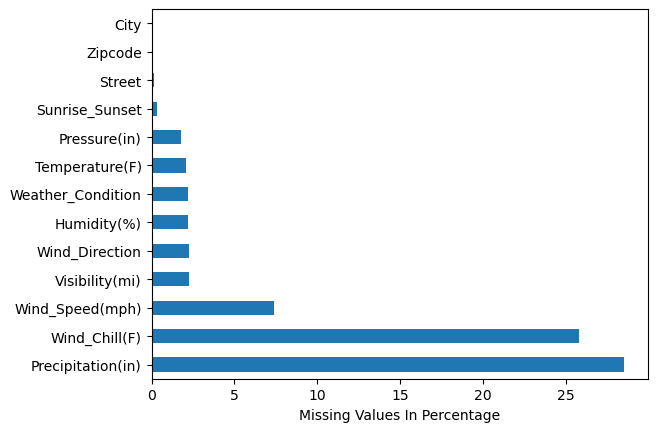

In [74]:
missing_percent = df.isnull().mean().sort_values (ascending = False) * 100
missing_percent[missing_percent !=0].plot(kind='barh')
plt.xlabel('Missing Values In Percentage')

Given the vastness of our dataset, comprising `500.000` entries. As a result, excluding rows linked to columns with `less than 5%` missing data is unlikely to substantially affect our analysis. Hence, we can confidently discard data with less than 5% missing values. 

In [75]:
df.dropna(subset=['Visibility(mi)', 'Wind_Direction', 'Humidity(%)', 'Weather_Condition', 'Temperature(F)', 'Pressure(in)', 'Sunrise_Sunset', 'Street', 'Zipcode'], inplace=True)

- The columns `Precipitation(in)`, `Wind_Chill(F)`, and `Wind_Speed(mph)` (28.52%, 25.8%, and 7.4% respectively) exhibit a high percentage of missing data.
- If we were to remove these missing entries, it would result in a substantial loss of approximately 200,000 records
- Consequently, we have decided to address this issue by imputing the missing values with the respective mean values of those fields.

In [76]:
columns = ['Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)']

for c in columns:
    df[c].fillna(df[c].mean(), inplace=True)

Let's run the `display_data_profile()` on the modified data.

In [77]:
display_data_profile(df)

'----------------------------------------------------------------------'
The Dataset Contains, Rows: 480,659 & Columns: 34
'----------------------------------------------------------------------'


                  DataType  Missing Values  Missing %  Unique Values
Severity             int64               0        0.0              4
Start_Time          object               0        0.0         468542
End_Time            object               0        0.0         474937
Start_Lat          float64               0        0.0         355075
Start_Lng          float64               0        0.0         356246
Distance(mi)       float64               0        0.0          10419
Street              object               0        0.0          85662
City                object               0        0.0           8921
County              object               0        0.0           1560
State               object               0        0.0             49
Zipcode             object               0        0.0         123668
Temperature(F)     float64               0        0.0            709
Wind_Chill(F)      float64               0        0.0            797
Humidity(%)        float64        

It's time to remove duplicate rows.

In [78]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after dropping duplicates:", len(df.index))

Number of rows: 480659


Number of rows after dropping duplicates: 480170


In this phase of the analysis, we performed thorough data preprocessing and cleaning to enhance the quality of the dataset. 

With the dataset now well-prepared, we are poised to transition to the Exploratory Data Analysis (EDA) phase, where we will delve deeper into the insights and patterns within the data.

## Exploring Accidents: A Deep Dive into Data Insights (Raise questions that need answering)
---

### Question 1:

#### The purpose of the question

#### How to solve the question

#### Pre-processing

#### Exploratory Analysis and Visualization

#### Answer the question

### Question 2:

#### The purpose of the question

#### How to solve the question

#### Pre-processing

#### Exploratory Analysis and Visualization

#### Answer the question

### Question 3:

#### The purpose of the question

#### How to solve the question

#### Pre-processing

#### Exploratory Analysis and Visualization

#### Answer the question

### Question 4:

#### The purpose of the question

#### How to solve the question

#### Pre-processing

#### Exploratory Analysis and Visualization

#### Answer the question

## Reflection

## References

* https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
  
* https://www.kaggle.com/code/yasirkhan1811/us-accidents-data-analysis-2016-2023
  
* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. [“A Countrywide Traffic Accident Dataset.”](https://arxiv.org/abs/1906.05409), 2019.

* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. ["Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights."](https://arxiv.org/abs/1909.09638) In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

<center>
    <img src="https://media.tenor.com/Ydeuc5VH3gIAAAAd/anime-crash.gif" />
</center>

<ul style="list-style-type:none; text-align: center;">
    <li style="font-family:'Microsoft JhengHei UI Light';font-weight: bold;font-size:40px;color:  #6468e8">Thank You!</li>
    <li style="font-family:'Microsoft JhengHei UI Light';font-weight: bold;font-size:35px;color:  #6468e8">Please give us 10 points, Teacher</li>
</ul>